# Simulations for DNA circuits with Python3
### Part II Perform the simulations
In this part, we will introduce the mathematical fundamentals of the simulative method, followed by the code implementation of the whole reaction.
#### 1.1 Second-order reaction
In fact, DNA circuits are always composed of DNA strand displacement. And DNA strand displacement can be represented by:

$$A + B \xrightarrow[]{k} C + D$$

It is observed by researchers that the DNA strand displacement is a kind of [second-order reaction](https://en.wikipedia.org/wiki/Second-order_reaction), where the rate may be proportional to one concentration squared $r = k[A]^2$, or (more commonly) to the product of two concentrations $r = k[A][B]$.

note: [X] stands for the concentration of X.

The curves of the second-order reaction may look like this (corresponding to the concentration of C in the reaction above, and the reaction occurs in step 100):

![](Figs/fig_2_1.png)

In this case, the rate equation is: $r = -\frac{dA}{dt} = -\frac{dB}{dt} = \frac{dC}{dt} = \frac{dD}{dt} = k[A][B]$

And at the same time, we have the mass balance equation:

$[A_0] - [A] = [B_0] - [B] = [C] = [D]$

where $[A_0]$, $[B_0]$ are the initial concentrations of A and B, respectively. For simplicity, we assume the initial concentrations of A and B are the same: 

$[A_0] = [B_0]$

Our goal is to obtain the relationship between the concentration of the product [C] and time t. So we have two methods to address the problem:


##### Integral method, analytic solutions
According to the mass balance equation, we can obtain the relationship between A and B:

$[B] = [A]$

then we have:

$\frac{dA}{dt} = -k[A]^2$

$-\frac{1}{[A]^2} dA = k dt$

$\frac{1}{[A]} = kt + C$

When t=0, $[A] = [A_0]$. Therefore, C = $\frac{1}{[A_0]}$.

$[A] = \frac{[A]_0}{kt[A_0] + 1}$

Let k = 10000 $M^{-1}step^{-1}$, $[A_0] = 1 \mu M$. We can plot the concentration of A:

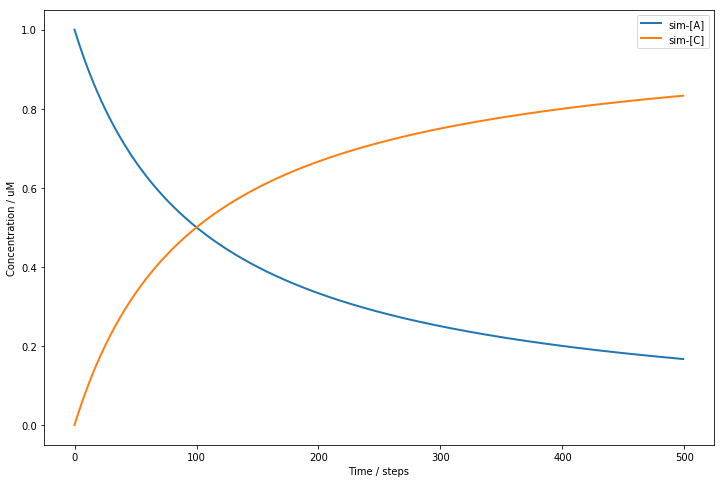

In [6]:
import numpy as np
import matplotlib.pyplot as plt

def get_A(A0, k, t):
    return A0 / (k * t * A0 + 1)

A0 = 1e-6
k = 1e+4
t = np.linspace(0, 499, 500)
scale = 1e+6    #scale: uM

A = get_A(A0, k, t)

plt.figure(figsize=(12,8))
plt.plot(t, A*scale, label='sim-[A]', color='C0', linewidth=2)
plt.plot(t, (A0 - A)*scale, label='sim-[C]', color='C1', linewidth=2)
plt.legend()
plt.xlabel('Time / steps')
plt.ylabel('Concentration / uM')
plt.show()

##### Iterative method, numerical solutions
Sometimes, the form of the integration is difficult to calculate, then the iterative method can be an alternative way to model the reaction.

At time t, the concentration of the reactant R can be represented as R(t). For reaction $A + B \xrightarrow[]{k} C + D$, at time t, the reaction rate can be calculated as $r = k \cdot A(t) \cdot B(t)$.

So at time t+1, we have:

$A(t+1) = A(t) - r = A(t) - k \cdot A(t) \cdot B(t)$

$B(t+1) = B(t) - r = B(t) - k \cdot A(t) \cdot B(t)$

$C(t+1) = C(t) + r = C(t) + k \cdot A(t) \cdot B(t)$

$D(t+1) = D(t) + r = D(t) + k \cdot A(t) \cdot B(t)$

And the initial conditions are: $A(0) = [A]_0$, $B(0) = [B]_0$, $C(0) = 0$, $D(0) = 0$.

We can create a function to calculate the concentrations of the reactants time series:

In [ ]:
def 